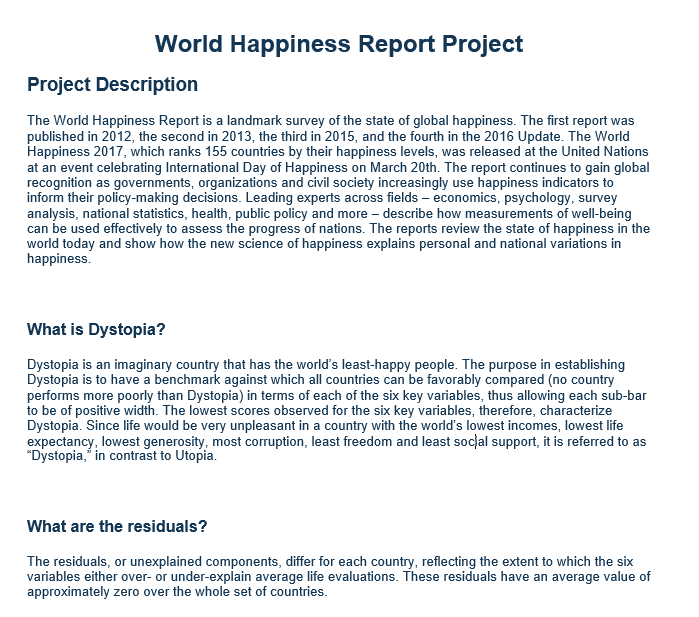
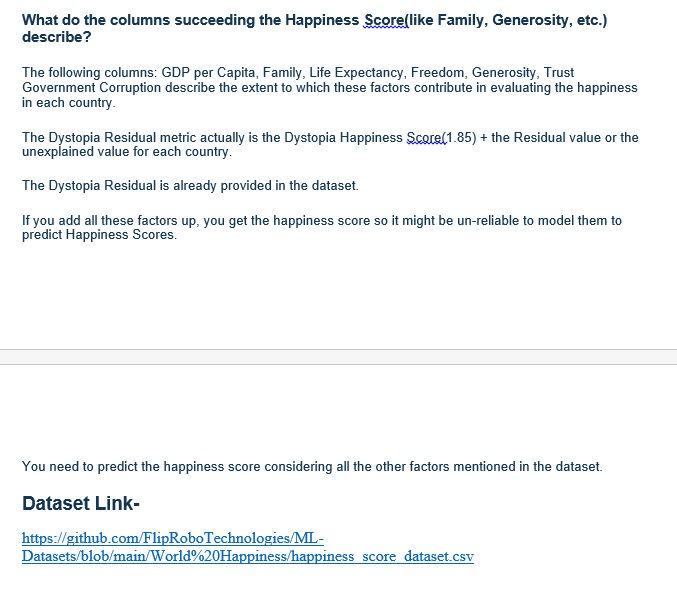

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from  sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN


In [131]:
df=pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [43]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [44]:
df['Country'].value_counts()

Country
Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: count, Length: 158, dtype: int64

In [11]:
df['Region'].value_counts()

Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64

<Axes: >

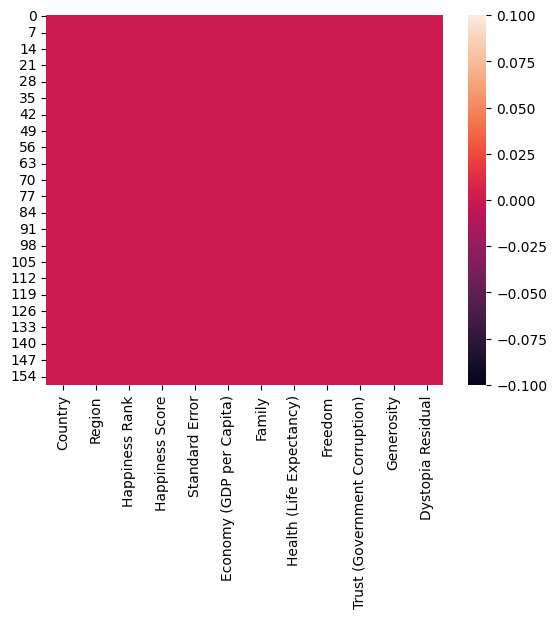

In [15]:
sns.heatmap(df.isnull())

In [132]:
df = df.drop(columns=['Country', 'Region', 'Happiness Rank', 'Standard Error'])
df.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Economy (GDP per Capita)       158 non-null    float64
 2   Family                         158 non-null    float64
 3   Health (Life Expectancy)       158 non-null    float64
 4   Freedom                        158 non-null    float64
 5   Trust (Government Corruption)  158 non-null    float64
 6   Generosity                     158 non-null    float64
 7   Dystopia Residual              158 non-null    float64
dtypes: float64(8)
memory usage: 10.0 KB


In [95]:
x=df.drop('Happiness Score',axis=1)
y=df['Happiness Score']

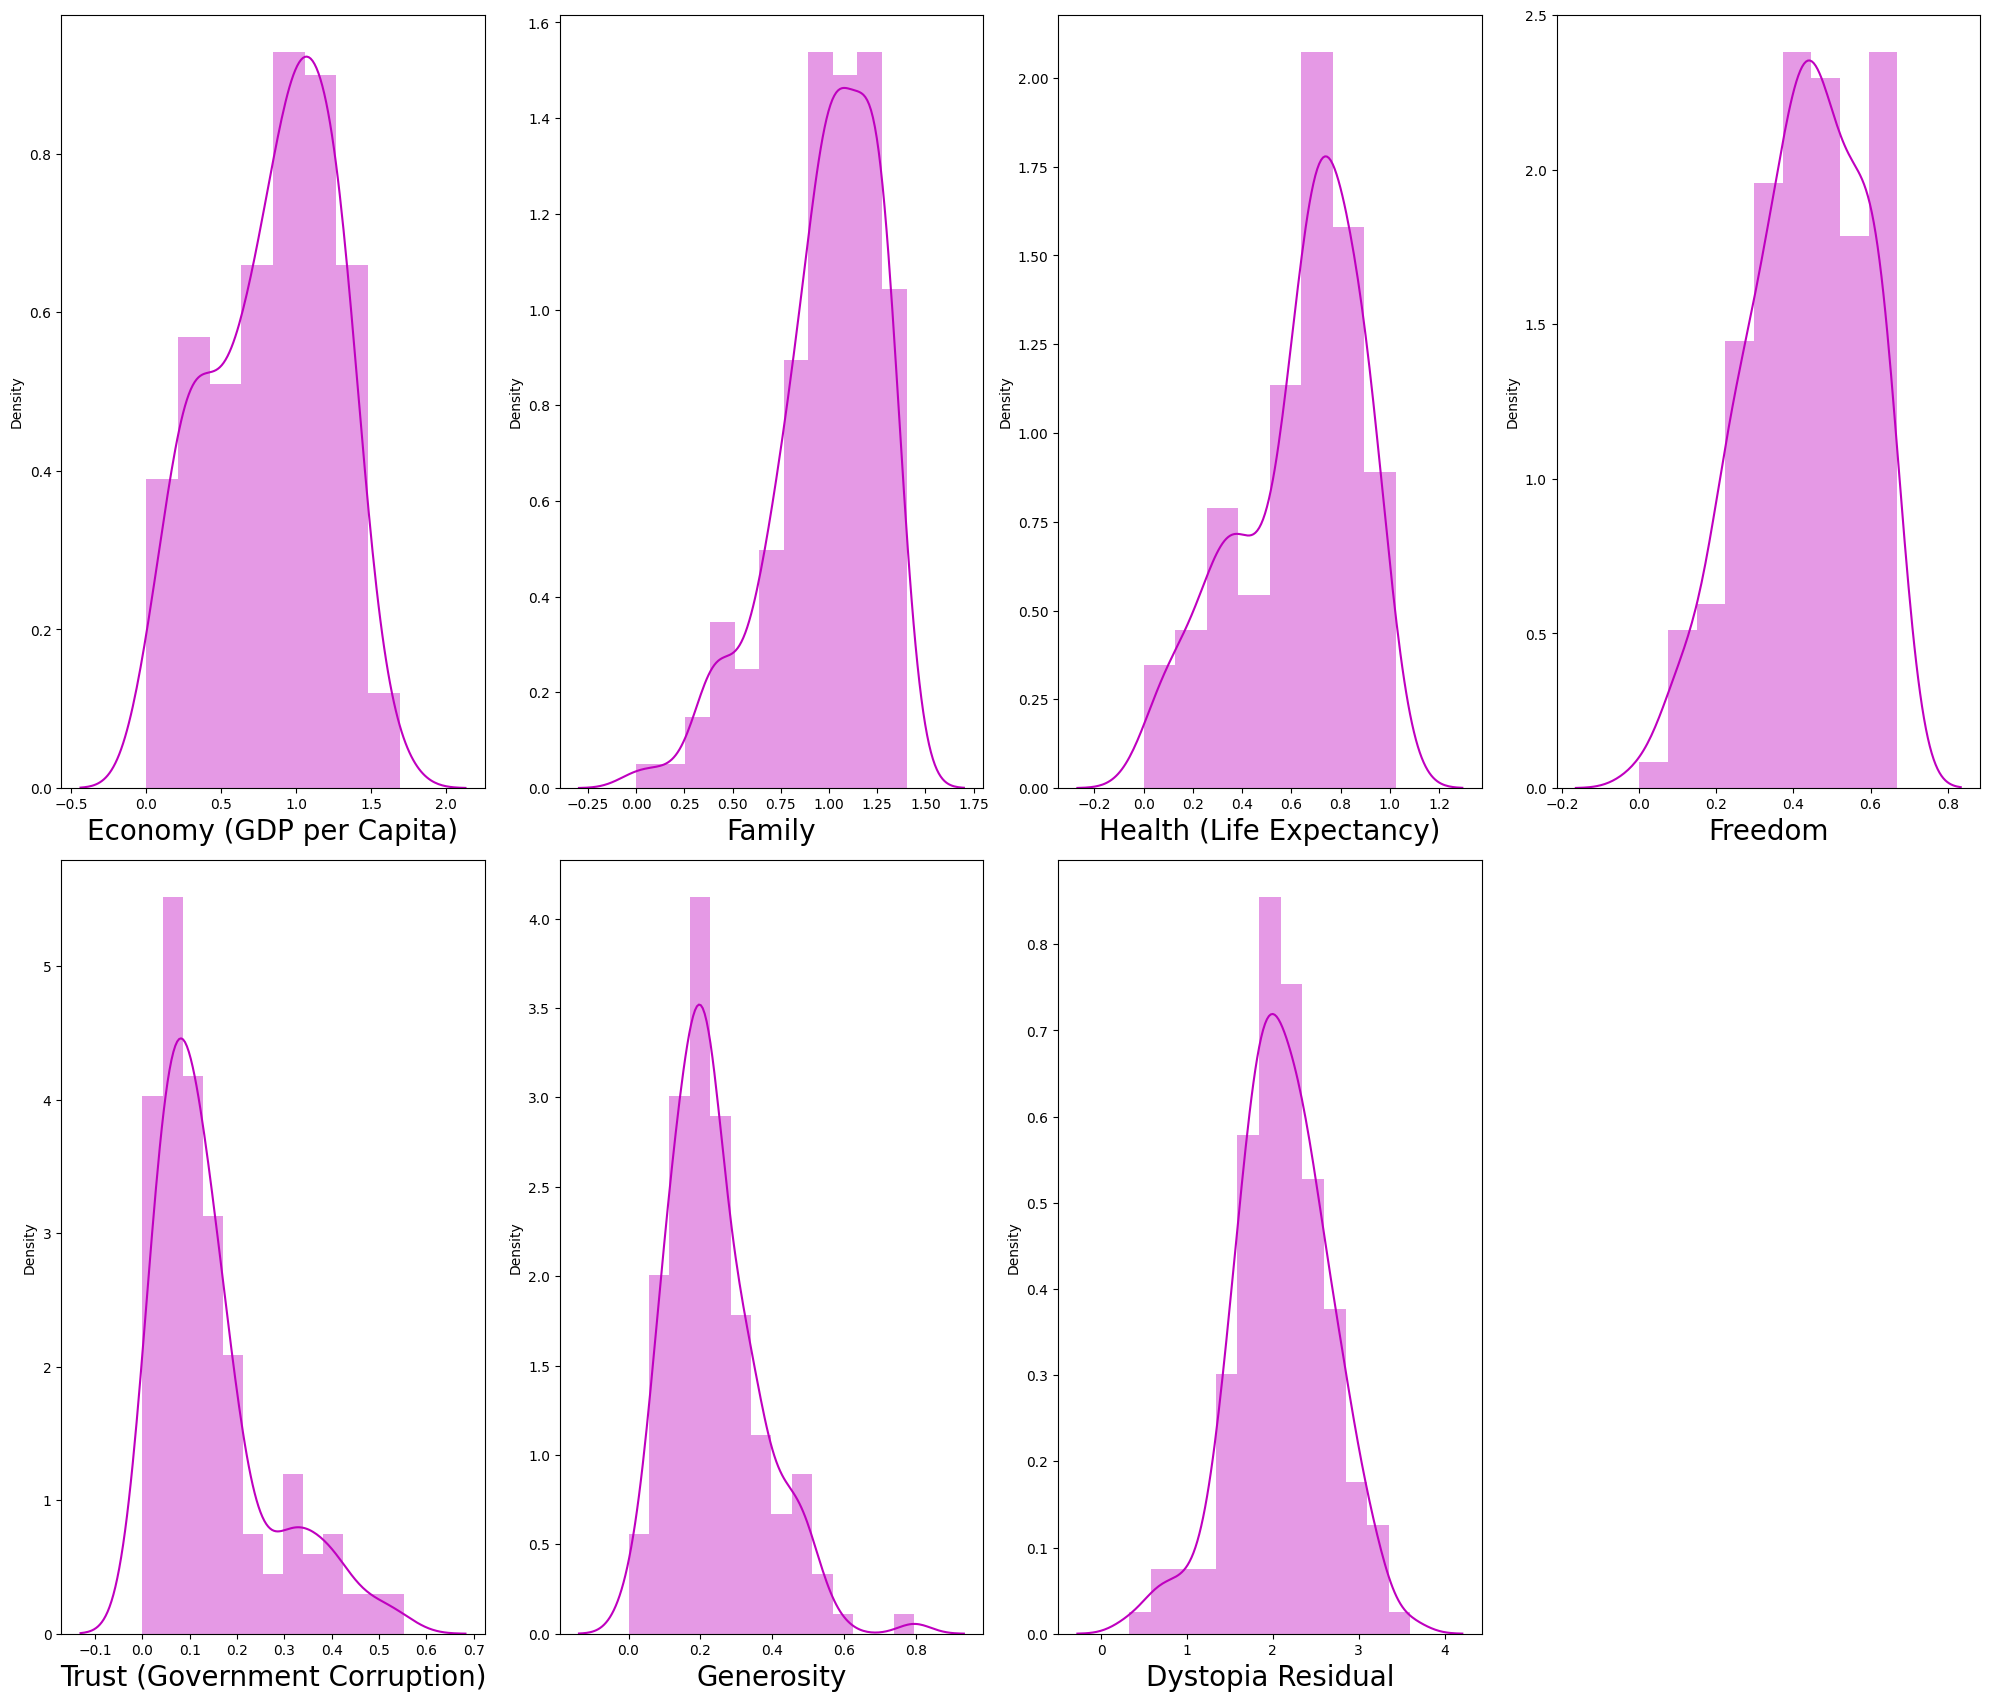

In [96]:
plt.figure(figsize=(20,25),facecolor='white')
p=1

for col in x:
    axs=plt.subplot(3,4,p)
    sns.distplot(df[col],color='m')
    plt.xlabel(col,fontsize=20)
    p+=1
plt.tight_layout()

In [97]:
df.skew()

Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [133]:
#Removing the sewness using cuberoot method

df['Trust (Government Corruption)']=np.cbrt(df['Trust (Government Corruption)'])
df['Generosity']=np.cbrt(df['Generosity'])
df.skew()

Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    0.011932
Generosity                      -0.961079
Dystopia Residual               -0.238911
dtype: float64

It seems that the cube root transformation significantly reduced the skewness for "Trust (Government Corruption)" but not for "Family" and "Generosity". The skewness for "Family" actually increased, becoming more negatively skewed, and "Generosity" still has notable skewness. This indicates that the cube root transformation was not effective for these variables.

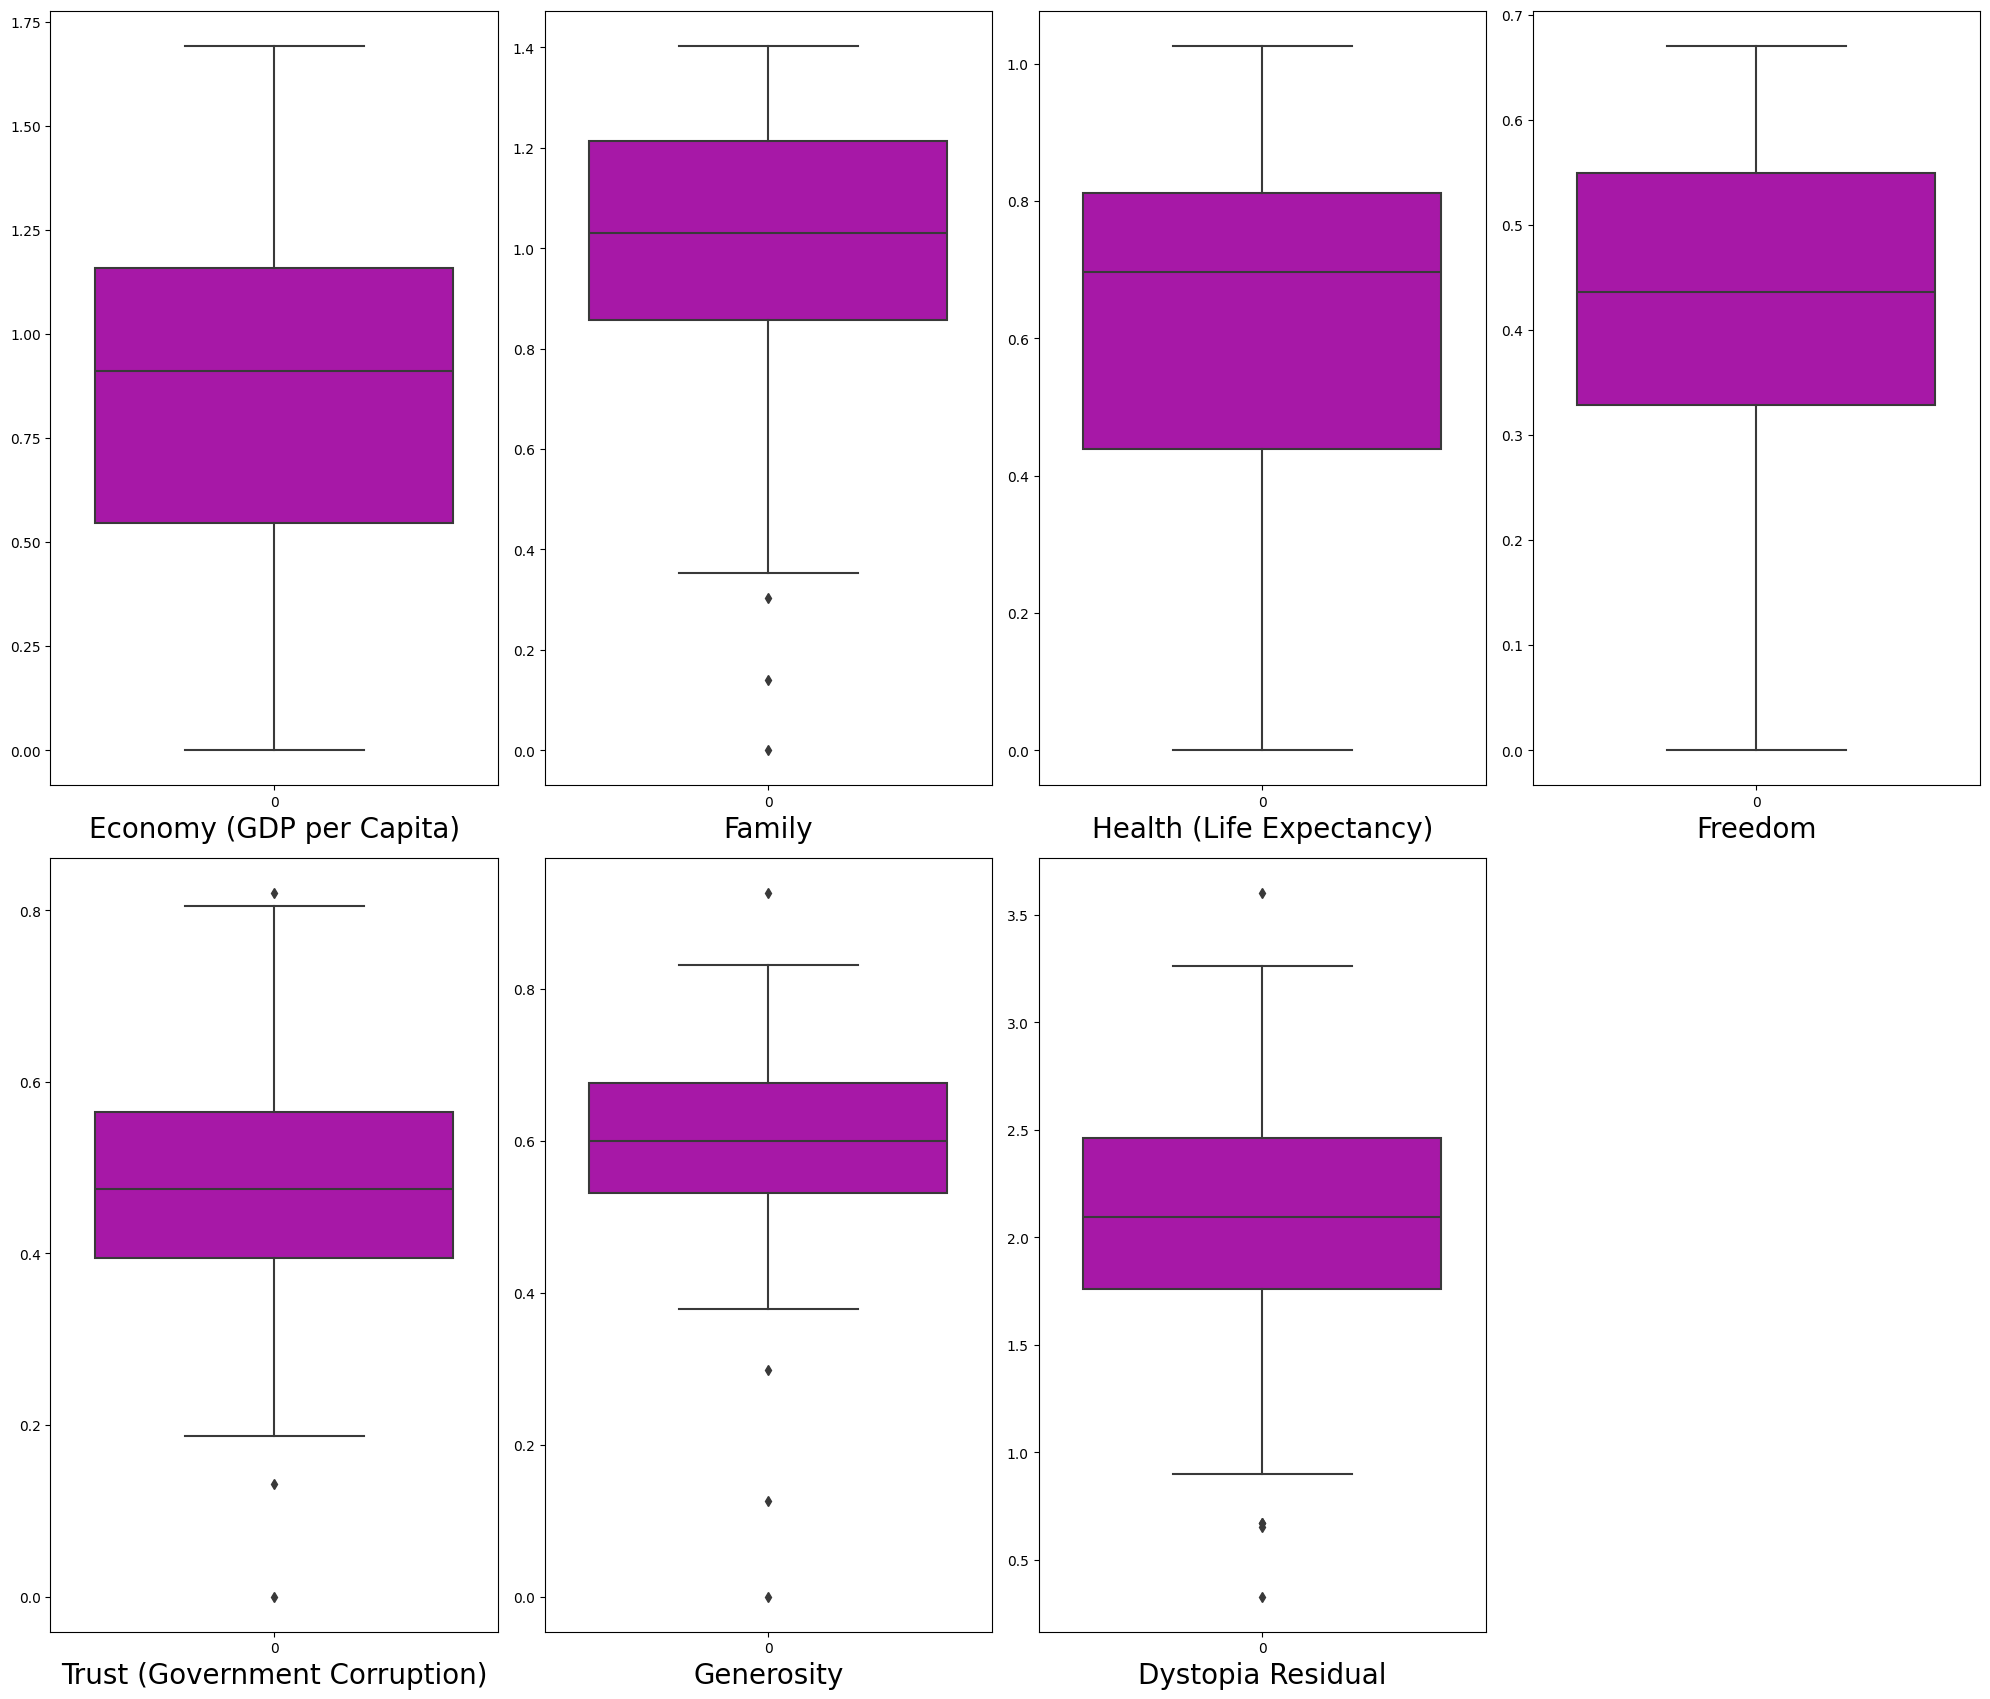

In [99]:
plt.figure(figsize=(20,25),facecolor='white')
p=1

for col in x:
    axs=plt.subplot(3,4,p)
    sns.boxplot(df[col],color='m')
    plt.xlabel(col,fontsize=20)
    p+=1
plt.tight_layout()

In [134]:
from scipy.stats import zscore
out_features=df[['Family','Trust (Government Corruption)','Generosity','Dystopia Residual']]
z=np.abs(zscore(out_features))
z

,Family,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.320281,1.826993,0.576890,0.758258
1,1.514458,0.260958,1.325808,1.092857
2,1.361054,2.075620,0.837993,0.712335
3,1.251922,1.592625,0.869128,0.663893
4,1.221204,1.428028,1.427657,0.639337
...,...,...,...,...
153,0.800520,2.318782,0.104570,2.588925
154,2.346860,0.357762,0.239847,0.843967
155,1.901086,0.624780,1.489900,3.208430
156,2.118467,0.123602,0.118581,0.481985


In [135]:
# Deleting all which > 3 zscore

New_df=df[(z<3).all(axis=1)]
print(New_df.shape)
print(df.shape)

(152, 8)
(158, 8)


In [102]:
New_df.skew()

Happiness Score                  0.151821
Economy (GDP per Capita)        -0.316484
Family                          -0.771443
Health (Life Expectancy)        -0.701200
Freedom                         -0.403104
Trust (Government Corruption)    0.205825
Generosity                       0.028223
Dystopia Residual               -0.109003
dtype: float64

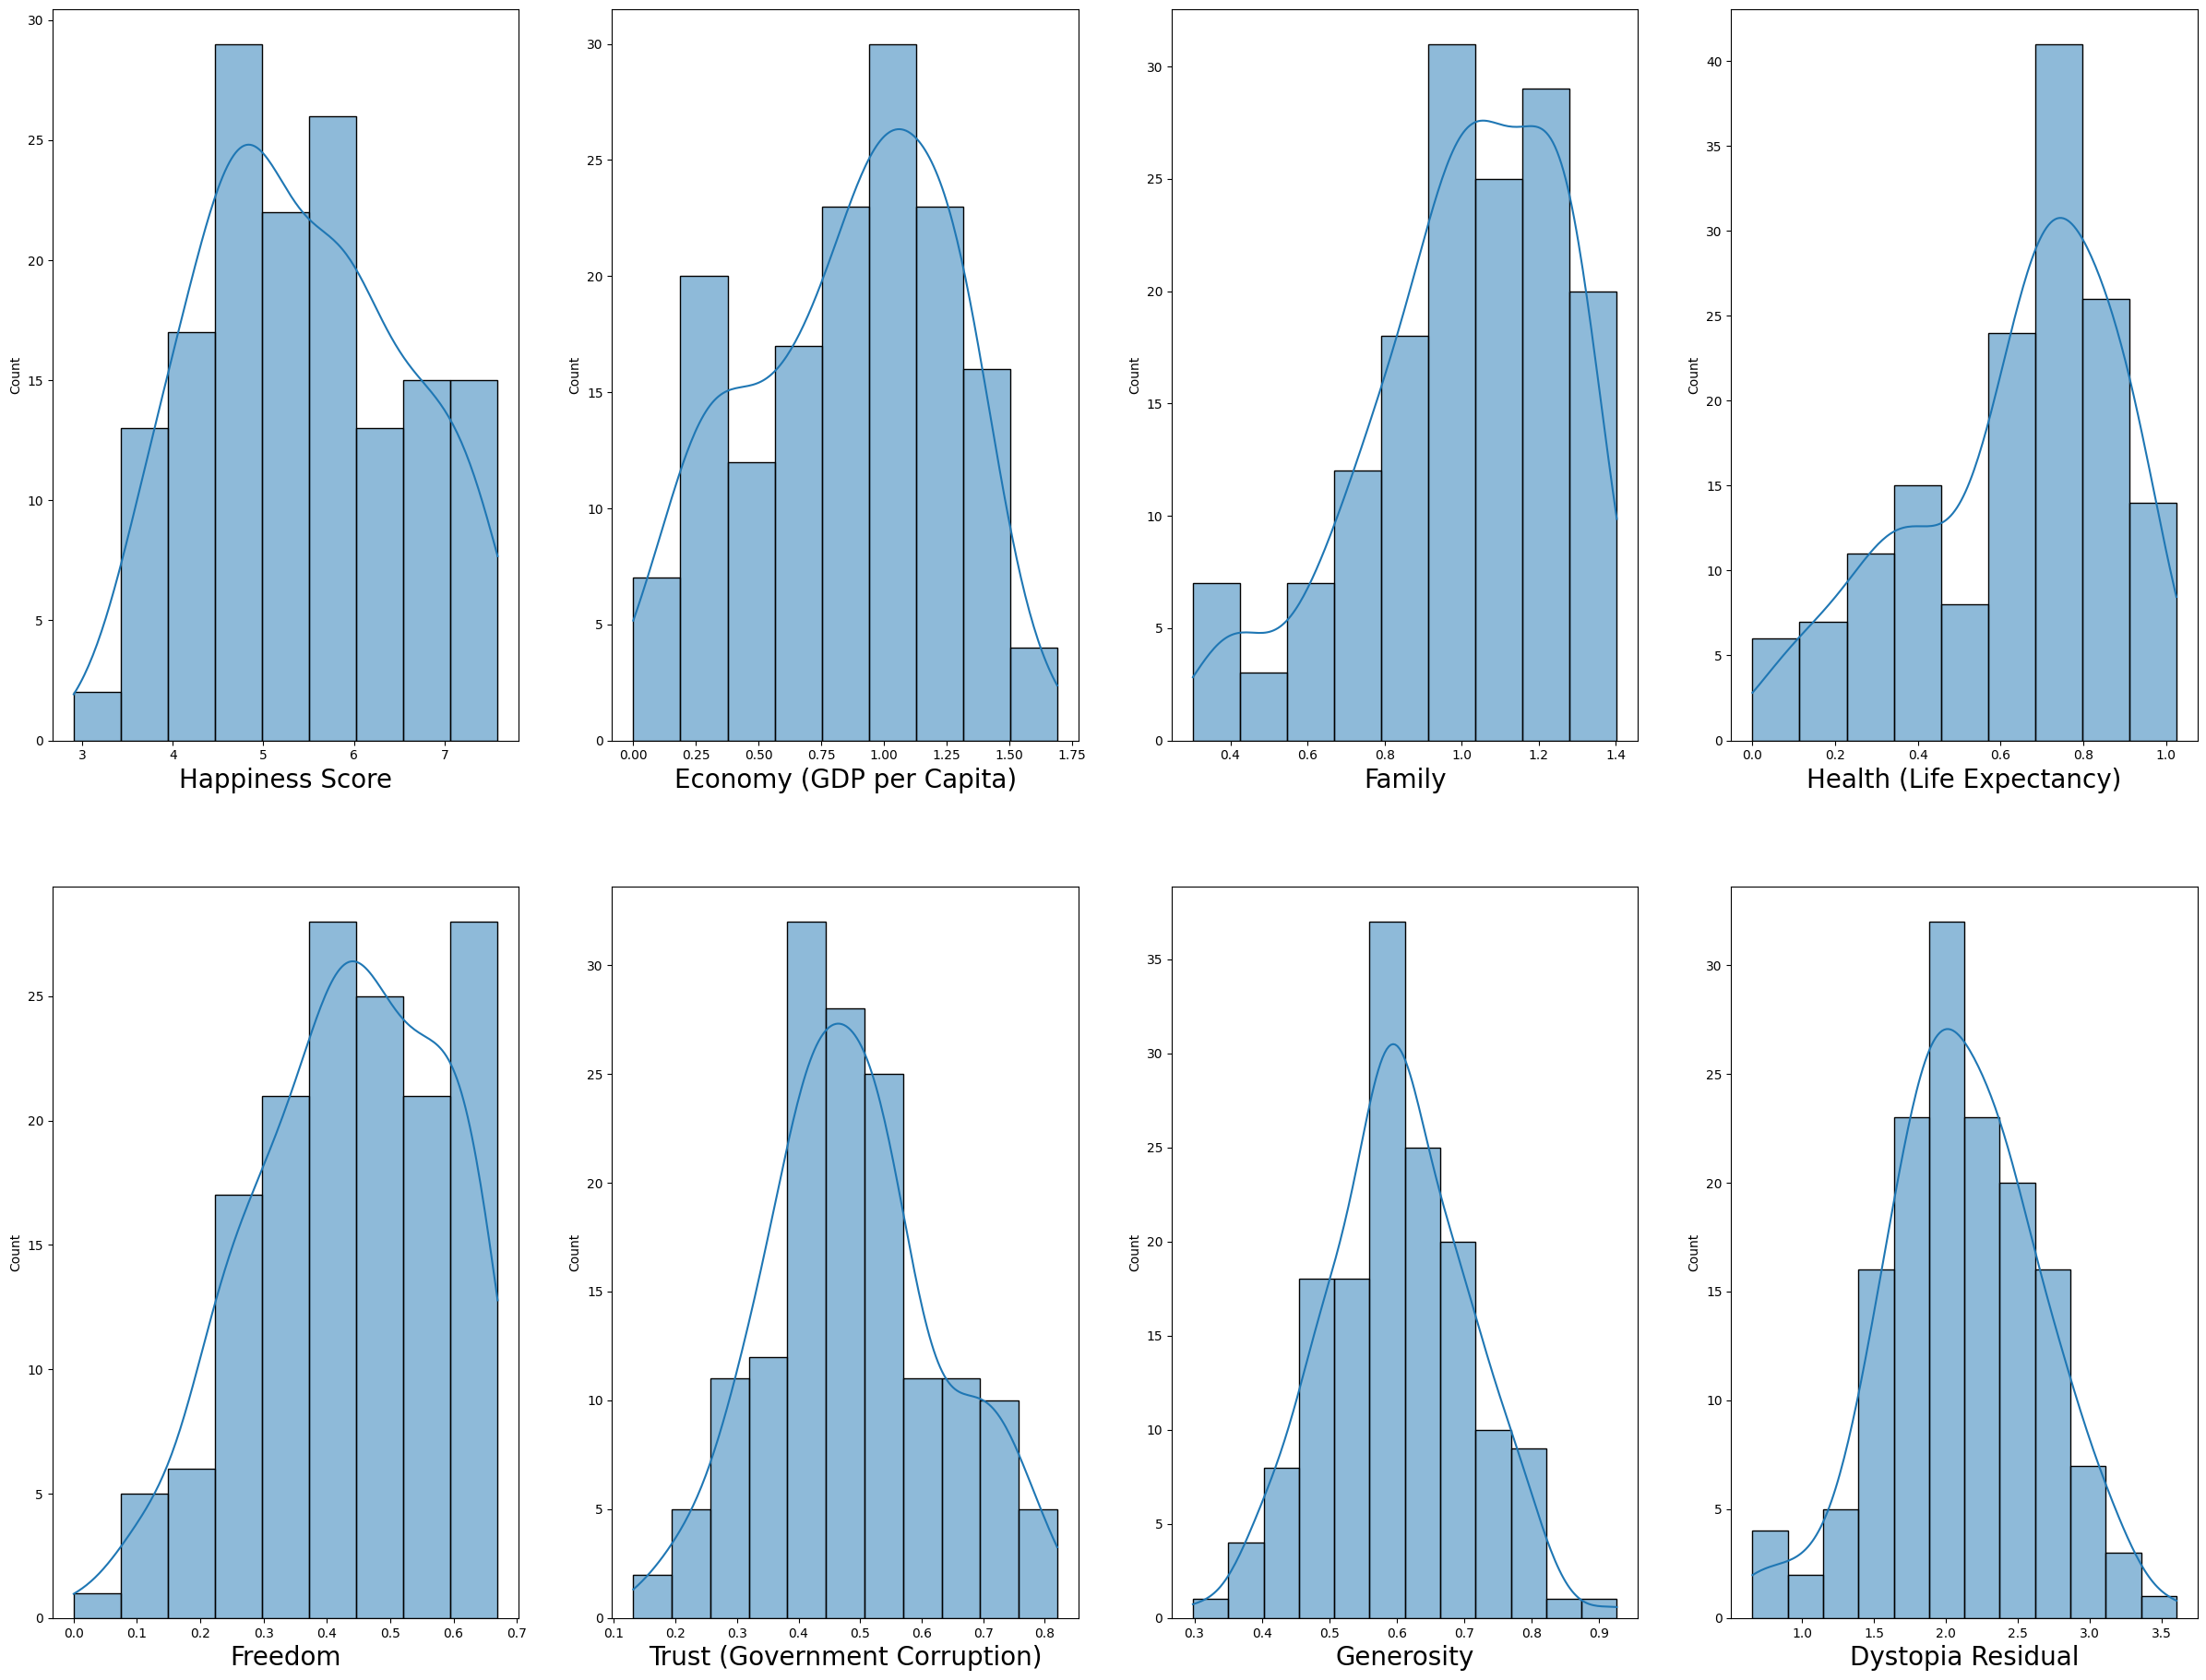

In [103]:

plt.figure(figsize=(30,35),facecolor='white')
p=1

for col in New_df.columns:
    axs=plt.subplot(3,4,p)
    sns.histplot(New_df[col], kde=True)
    plt.xlabel(col,fontsize=20)
    p+=1
plt.show()


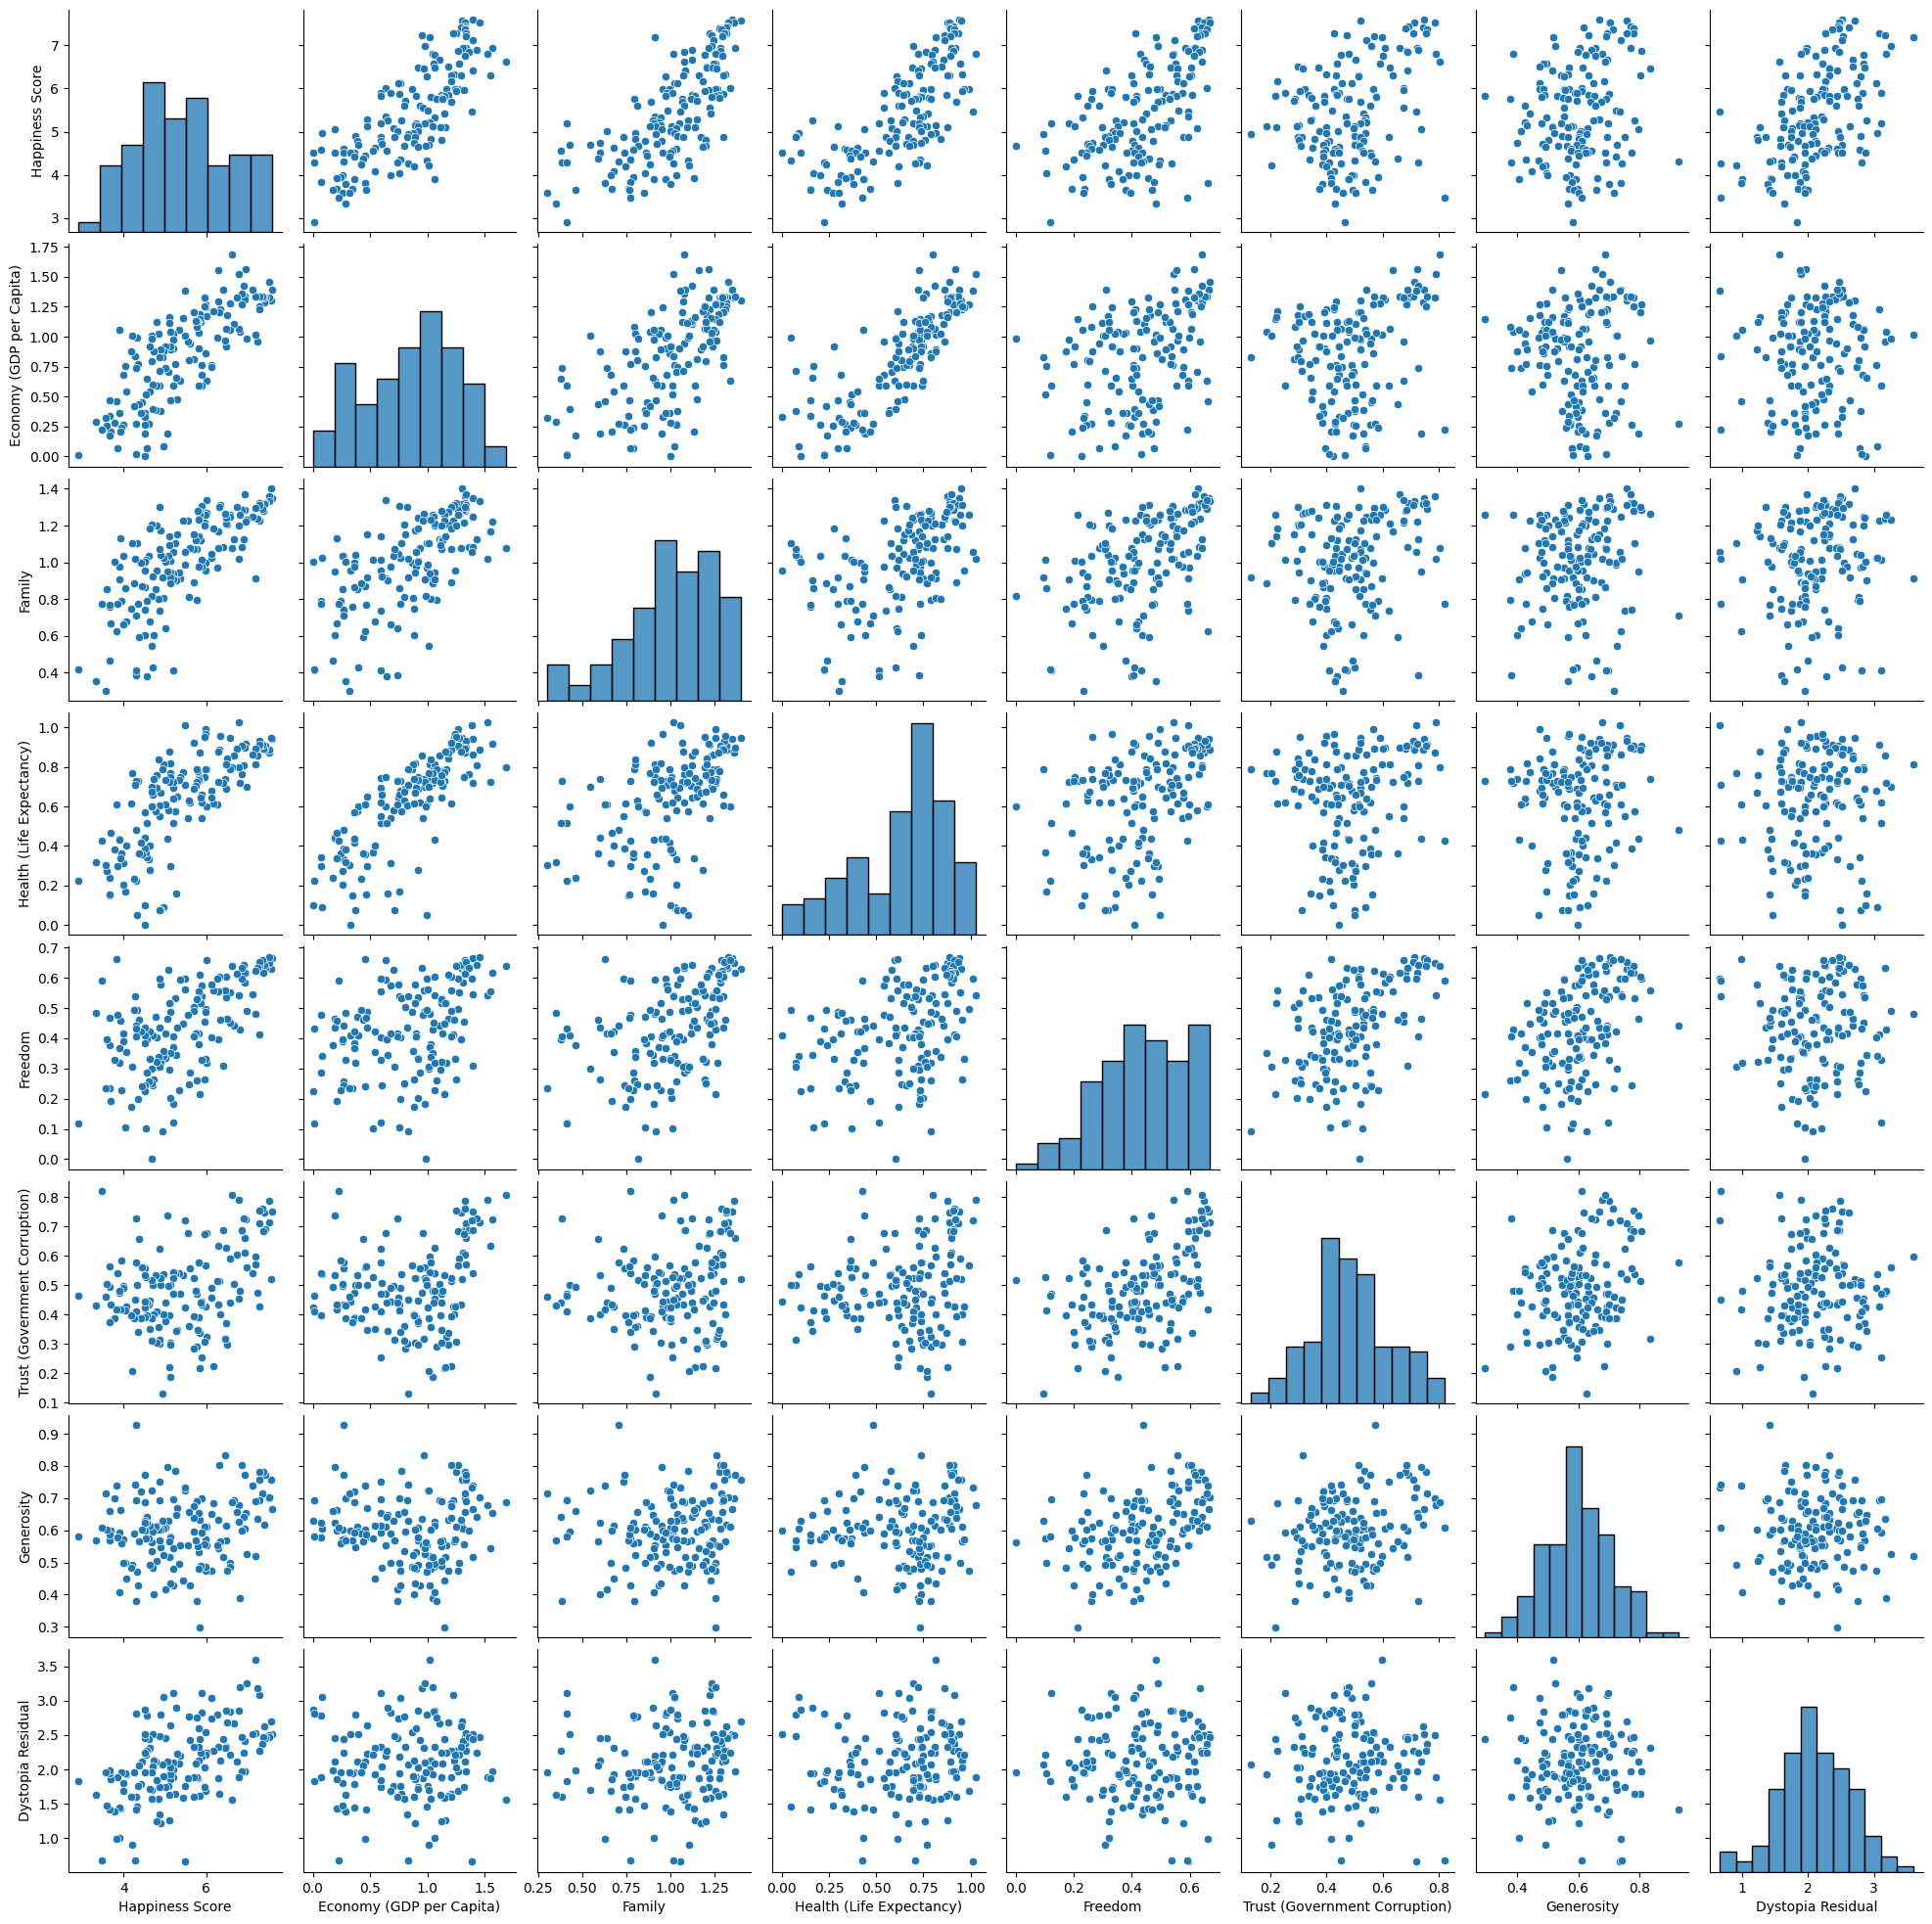

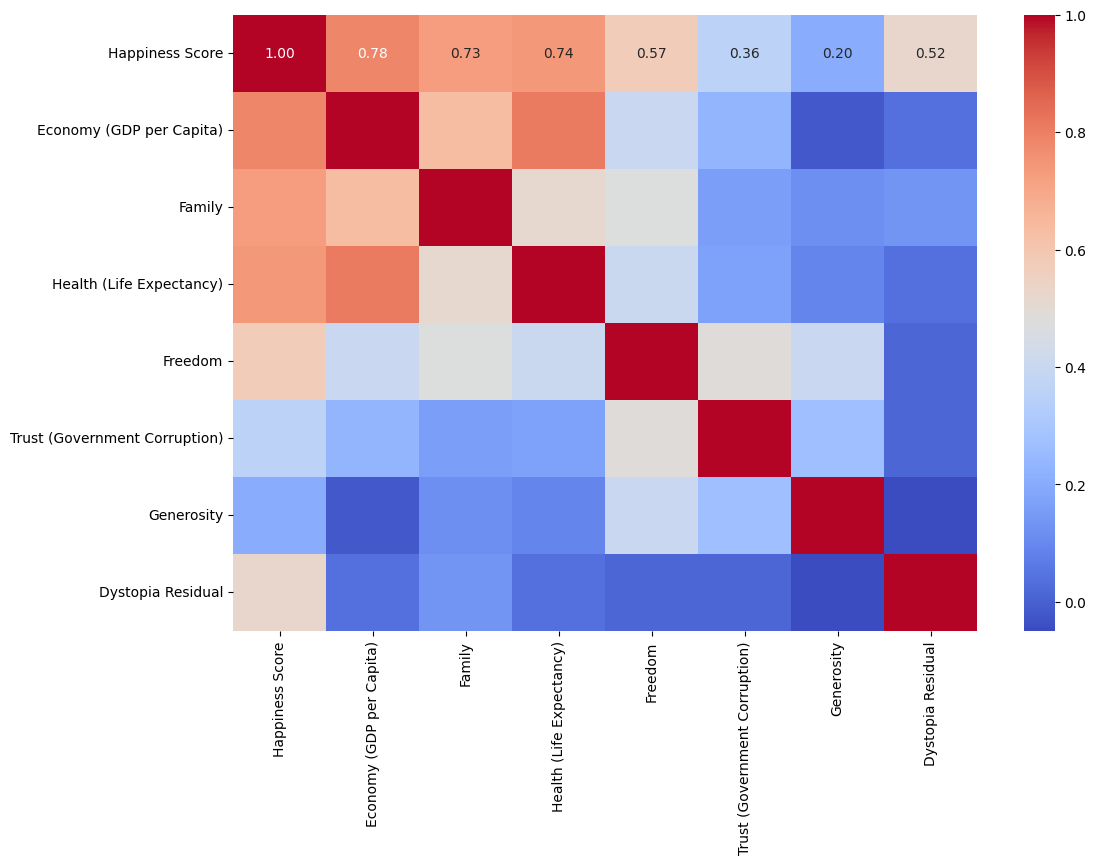

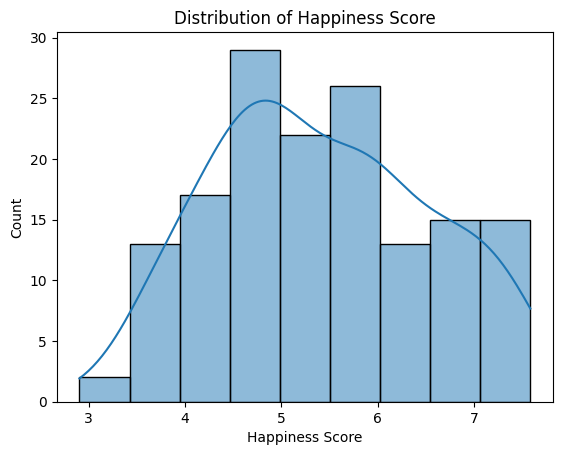

In [104]:
# Pairplot to visualize relationships
sns.pairplot(New_df)
plt.show()

# Correlation matrix
corr_matrix = New_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Distribution of the target variable
sns.histplot(New_df['Happiness Score'], kde=True)
plt.title('Distribution of Happiness Score')
plt.show()

In [136]:
X = New_df.drop(columns=['Happiness Score'])
y = New_df['Happiness Score']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(121, 7) (31, 7)
(121,) (31,)


In [138]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LinearRegression()
R2_Score: 0.998478140723607
R2 Score on traing data:  0.9982824280607085
Mean absulute error: 0.035060907390673156
Mean scuared error: : 0.0018251205101273784
Root Mean scuared error: : 0.042721429167659856


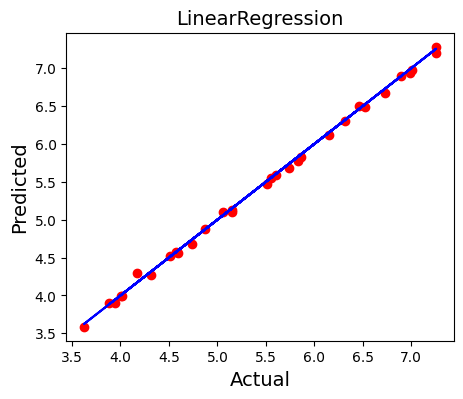

In [139]:
LR=LinearRegression()
LR.fit(X_train_scaled,y_train)
predLR=LR.predict(X_test_scaled)
pred_Train=LR.predict(X_train_scaled)
print(LR)
print('R2_Score:', r2_score(y_test,predLR))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_test,predLR))
print('Mean scuared error: :', mean_squared_error(y_test,predLR))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,predLR)))


plt.figure(figsize=(5,4))
plt.scatter(x=predLR,y=y_test,color='red')
plt.plot(predLR,predLR,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('LinearRegression',fontsize=14)
plt.show()

RandomForestRegressor()
R2_Score: 0.9192860751924918
R2 Score on traing data:  0.98684257843908
Mean absulute error: 0.2446500000000006
Mean scuared error: : 0.09679780640967767
Root Mean scuared error: : 0.3111234584689455


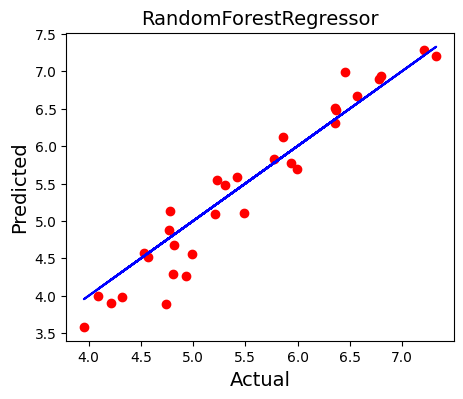

In [140]:
RDF=RandomForestRegressor()
RDF.fit(X_train_scaled,y_train)
pred_RDF=RDF.predict(X_test_scaled)
pred_Train=RDF.predict(X_train_scaled)
print(RDF)
print('R2_Score:', r2_score(y_test,pred_RDF))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_test,pred_RDF))
print('Mean scuared error: :', mean_squared_error(y_test,pred_RDF))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,pred_RDF)))

plt.figure(figsize=(5,4))
plt.scatter(x=pred_RDF,y=y_test,color='red')
plt.plot(pred_RDF,pred_RDF,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('RandomForestRegressor',fontsize=14)
plt.show()

### Hyperparameter tuning for Random Forest

In [141]:


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}



In [142]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=RDF, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [144]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [145]:
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [157]:
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled)
y_pred_best_rf

array([5.535765  , 3.99172367, 4.73183833, 4.806435  , 4.37120773,
       4.79431   , 6.45204076, 7.20441   , 6.792805  , 6.33285   ,
       4.13794533, 5.07254706, 4.86113344, 6.7178    , 5.33860015,
       7.27741   , 5.72667267, 6.28237659, 4.91647   , 4.4784131 ,
       4.93909006, 6.385214  , 5.79571   , 5.22424167, 5.7995059 ,
       4.32796167, 6.33215   , 5.30400578, 4.40242667, 5.73439167,
       5.63628778])

In [148]:
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f'Best Random Forest Mean Squared Error: {mse_best_rf}')
print(f'Best Random Forest R^2 Score: {r2_best_rf}')

Best Random Forest Mean Squared Error: 0.12553404639199076
Best Random Forest R^2 Score: 0.8953246364036161


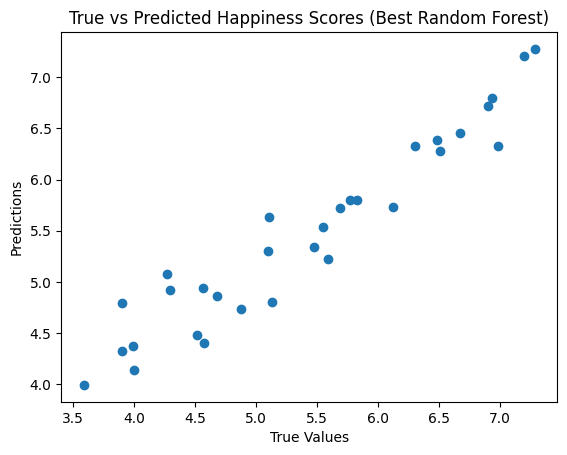

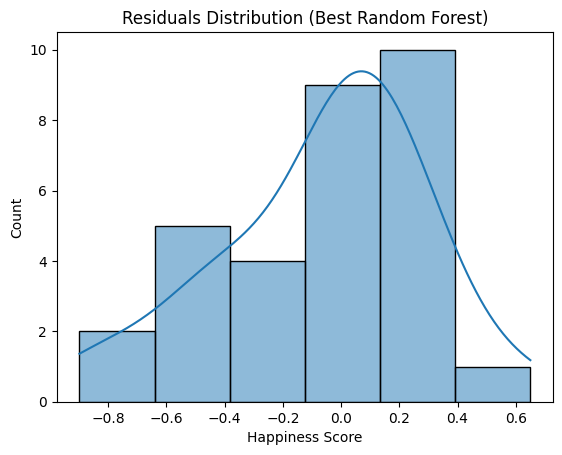

In [151]:
# Plotting the true vs predicted values for the best model
plt.scatter(y_test, y_pred_best_rf)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Happiness Scores (Best Random Forest)')
plt.show()

# Residuals plot
residuals = y_test - y_pred_best_rf
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution (Best Random Forest)')
plt.show()


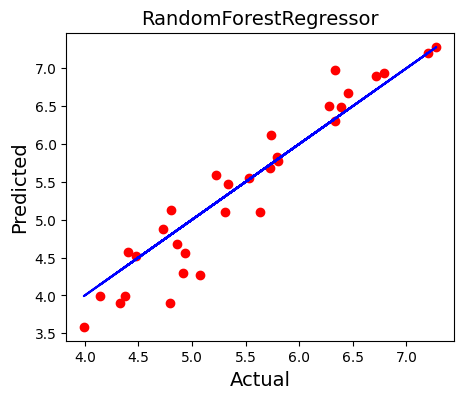

In [152]:
plt.figure(figsize=(5,4))
plt.scatter(x=y_pred_best_rf,y=y_test,color='red')
plt.plot(y_pred_best_rf,y_pred_best_rf,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('RandomForestRegressor',fontsize=14)
plt.show()

In [153]:
from sklearn.model_selection import cross_val_score


In [155]:
score1=cross_val_score(best_rf_model,X,y,cv=5, scoring='r2')
print(score1)
print(score1.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_test,y_pred_best_rf)-score1.mean()*100))

[-8.92681736 -1.68181231 -0.82958394 -1.9681096  -7.36058768]
-4.153382176953656
Difference between r2score and cross validation score is:  416.23354233176923
